In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import (
    KaplanMeierFitter, NelsonAalenFitter,
    WeibullFitter, ExponentialFitter,
    LogNormalFitter, LogLogisticFitter,
    CoxPHFitter
)

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
import plotly.express as px


In [4]:
data= pd.read_csv('data.csv')

In [5]:
data.head()

,age,income,employment_status,credit_limit,balance_to_limit_ratio,marital_status,sex,education_level,inflation_rate,interest_rate,exchange_rate_volatility,unemployment_rate,duration,loan_status,event
0,56,178.710736,unemployed,1203.811985,0.425774,divorced,2,high_school,165.803487,9.193481,18.471632,14.203278,59,active,0
1,69,540.692727,employed,655.361789,0.142038,divorced,1,high_school,128.671119,22.412669,27.863762,16.267269,60,active,0
2,46,348.729851,employed,1199.893750,0.039020,married,1,high_school,98.296342,23.301715,17.499108,12.160153,39,default,1
3,32,215.549258,employed,1138.777388,0.194078,married,2,bachelor,73.286927,23.737731,5.044299,13.884309,1,closed,0
4,60,370.685423,unemployed,482.257981,0.346845,divorced,1,postgrad,83.071304,18.024766,13.193849,9.957673,48,default,1


In [6]:
data.columns

Index(['age', 'income', 'employment_status', 'credit_limit',
       'balance_to_limit_ratio', 'marital_status', 'sex', 'education_level',
       'inflation_rate', 'interest_rate', 'exchange_rate_volatility',
       'unemployment_rate', 'duration', 'loan_status', 'event'],
      dtype='object')

In [225]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,43.819000,14.991030,18.000000,31.000000,44.000000,56.000000,69.000000
income,1000.0,512.831754,194.475351,100.000000,377.632895,510.767080,637.094042,1026.476413
credit_limit,1000.0,1002.368742,298.241875,102.659209,795.818370,1005.102995,1204.459795,2177.871312
balance_to_limit_ratio,1000.0,0.291853,0.164293,0.005368,0.164330,0.270787,0.408241,0.813342
sex,1000.0,1.526000,0.499573,1.000000,1.000000,2.000000,2.000000,2.000000
inflation_rate,1000.0,100.515691,28.918510,24.351856,81.188210,100.653598,119.456444,194.733138
interest_rate,1000.0,19.931024,4.824755,0.387999,16.692371,20.048120,23.162478,34.570546
exchange_rate_volatility,1000.0,14.843748,4.880410,-1.877896,11.573009,14.690220,18.214294,31.888841
unemployment_rate,1000.0,12.011835,3.021455,2.036656,10.073540,12.030373,13.947321,21.863284
duration,1000.0,34.291000,21.756785,1.000000,14.000000,34.000000,60.000000,60.000000


## **Data Visualization**

In [226]:
grouby_education = data.groupby("employment_status").agg({
    "credit_limit": 'sum',
    "income": 'sum'
}).reset_index()
grouby_education

,employment_status,credit_limit,income
0,employed,815355.955121,415853.542175
1,unemployed,187012.786858,96978.211569


In [227]:
import plotly.graph_objects as go

x = grouby_education["employment_status"]
credit_limit = grouby_education["credit_limit"]
income = grouby_education["income"]

fig = go.Figure(data=[
    go.Bar(
        name='Credit Limit',
        x=x,
        y=credit_limit,
        marker_color='dodgerblue',
        text=[f"{val/1000:.1f}K" for val in credit_limit],
        textposition='outside'
    ),
    go.Bar(
        name='Income',
        x=x,
        y=income,
        marker_color='mediumseagreen',
        text=[f"{val/1000:.1f}K" for val in income],
        textposition='outside'
    )
])


fig.update_layout(
    title={
        'text': 'Credit Limit and Income by Employment Status',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 22}
    },
    xaxis_title='Employment Status',
    yaxis_title='Value (K)',
    yaxis=dict(tickformat='.0f', tickprefix=''),
    barmode='group',
    template='plotly_white',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    )
)

fig.show()


In [228]:
import plotly.express as px
import pandas as pd

grouby_education_melted = grouby_education.reset_index().melt(
    id_vars=['employment_status'], 
    value_vars=['credit_limit', 'income'], 
    var_name='Metric', 
    value_name='Value'
)


fig = px.bar(
    grouby_education_melted, 
    x='employment_status', 
    y='Value', 
    color='Metric', 
    barmode='group',  
    title='Aggregated Data by Employment Status',
    labels={'employment_status': 'Employment Status', 
            'Value': 'Amount', 
            'Metric': 'Metric'},
    color_discrete_sequence=['#636EFA', '#EF553B']
)

fig.update_layout(
    template='plotly_white',  
    xaxis_title='Employment Status',
    yaxis_title='Amount',
    barmode='group'  
)

fig.show()


In [229]:
import plotly.express as px

fig = px.histogram(
    data, 
    x='marital_status', 
    color='loan_status', 
    barmode='group', 
    title='Marital Status vs Loan Status', 
    labels={'marital_status': 'Marital Status', 'loan_status': 'Loan Status'},
    color_discrete_sequence=['#1f77b4', '#ff7f0e']  # Improved color contrast
)

fig.update_layout(
    xaxis_title='Marital Status', 
    yaxis_title='Count',  
    xaxis={'categoryorder': 'total descending'},  # Sorting categories by total count
    template='plotly_white', 
    barmode='group',  
    title_x=0.5,  # Center the title
    title_font=dict(size=18, family='Arial', color='#333333'),  # Customize title font
    xaxis_tickangle=-45,  # Angle the x-axis labels for better readability
)

fig.show()


In [230]:
fig = px.box(
    data, 
    x='employment_status', 
    y='credit_limit',
    title='Credit Limit by Employment Status',
    labels={'employment_status': 'Employment Status', 'credit_limit': 'Credit Limit'},
    color='employment_status', 
    color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96']  
)


fig.update_layout(
    xaxis_title='Employment Status',
    yaxis_title='Credit Limit',
    template='plotly_white',
    boxmode='group',
    showlegend=False  
)

fig.show()


In [231]:
import plotly.express as px

fig = px.box(
    data, 
    x='loan_status', 
    y='interest_rate',
    title='Interest Rate by Loan Status',
    labels={'loan_status': 'Loan Status', 'interest_rate': 'Interest Rate (%)'}
)

fig.update_layout(
    title_x=0.5,  # Center the title
    title_font=dict(size=18, family='Arial', color='#333333'),  # Customize title font
    xaxis_title='Loan Status', 
    yaxis_title='Interest Rate (%)',  
    template='plotly_white',  # Clean white background
    yaxis=dict(range=[0, data['interest_rate'].max() * 1.1]),  # Adjust y-axis range to allow for outliers
    boxmode='group',  # Optionally group the boxes for clarity if needed
)

fig.show()


In [232]:
import plotly.express as px

fig = px.scatter(
    data, 
    x='inflation_rate', 
    y='unemployment_rate',
    color='loan_status',
    title='Inflation vs Unemployment Rate by Loan Status',
    labels={'inflation_rate': 'Inflation Rate (%)', 'unemployment_rate': 'Unemployment Rate (%)'},
    color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96'],  # Keep your original color scheme
    opacity=0.7
)

fig.update_layout(
    title='Inflation vs Unemployment Rate by Loan Status',
    title_x=0.5,  # Center the title
    title_font=dict(size=18, family='Arial', color='#333333'),  # Customize title font
    xaxis_title='Inflation Rate (%)',
    yaxis_title='Unemployment Rate (%)',
    template='plotly_white',  # Clean white background
    showlegend=True,  
    legend_title='Loan Status',  
    hovermode='closest',  
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
)

fig.show()


In [233]:
df= data.copy()

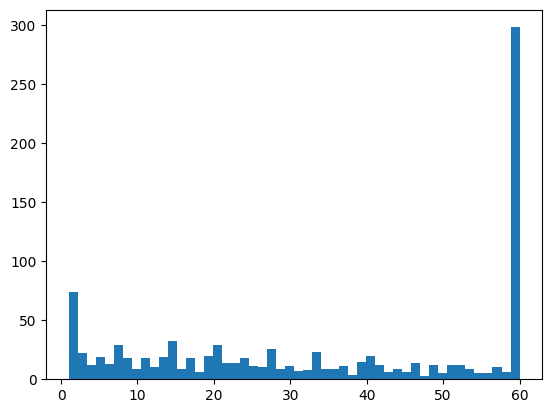

In [234]:
T= data['duration']
E= data['event']
plt.hist(T,bins=50)
plt.show()

In [235]:
data[data.isnull().any(axis=1)]

,age,income,employment_status,credit_limit,balance_to_limit_ratio,marital_status,sex,education_level,inflation_rate,interest_rate,exchange_rate_volatility,unemployment_rate,duration,loan_status,event


In [236]:
data['event'].value_counts()

event
1    532
0    468
Name: count, dtype: int64

<Axes: xlabel='timeline'>

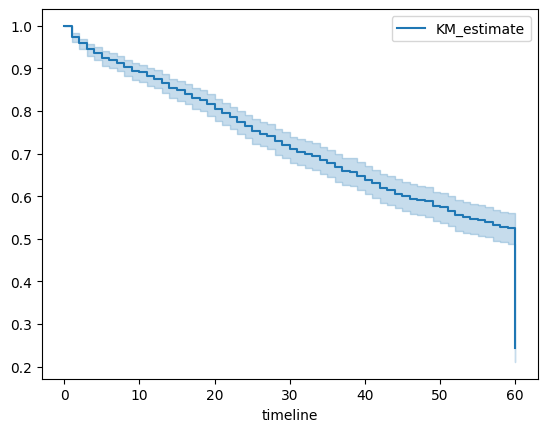

In [237]:
kmf = KaplanMeierFitter()
kmf.fit(durations=T,event_observed= E)
kmf.plot_survival_function()

<Axes: xlabel='timeline'>

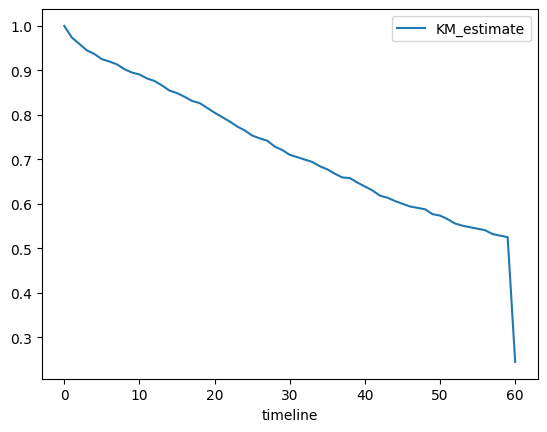

In [238]:
kmf.survival_function_.plot()

<Axes: xlabel='timeline'>

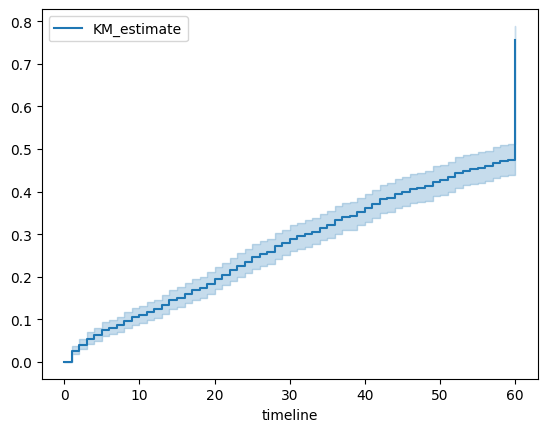

In [239]:
kmf.plot_cumulative_density()

In [240]:
kmf.median_survival_time_

60.0

In [241]:
from lifelines.utils import median_survival_times 
media_ = kmf.median_survival_time_
median_confidence_itnerval_ = median_survival_times(kmf.confidence_interval_)
print(media_)
print(median_confidence_itnerval_)

60.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    57.0                    60.0


In [242]:
data.drop(columns='loan_status',inplace=True)

In [243]:
data['sex'].value_counts()

sex
2    526
1    474
Name: count, dtype: int64

In [244]:
import plotly.graph_objects as go

m = (data['sex'] == 1)
kmf.fit(durations=T[m], event_observed=E[m], label="Male")
male_survival = go.Scatter(
    x=kmf.survival_function_.index,
    y=kmf.survival_function_["Male"],
    mode='lines',
    name='Male',
    line=dict(color='blue')
)
kmf.fit(durations=T[~m], event_observed=E[~m], label="Female")
female_survival = go.Scatter(
    x=kmf.survival_function_.index,
    y=kmf.survival_function_["Female"],
    mode='lines',
    name='Female',
    line=dict(color='red')
)
fig = go.Figure(data=[male_survival, female_survival])
fig.update_layout(
    title='Survival of Different Gender Groups',
    xaxis_title='Time',
    yaxis_title='Survival Probability',
    legend=dict(title="Gender"),
    template='plotly_white'
)
fig.show()



### Cox Propo Hazard Function 

In [245]:
def drop_high_cardinality_columns(df, threshold=0.7):
    """
    Drops columns from a DataFrame where the proportion of the most common category exceeds the threshold.

    Parameters:
    - df (DataFrame): Input DataFrame.
    - threshold (float): Threshold proportion (default is 0.7).

    Returns:
    - DataFrame: DataFrame with high cardinality columns dropped.
    """
    categorical_cols = df.select_dtypes(include=['object', 'category'])
    columns_to_drop = []
    for col in categorical_cols:
        top_freq = df[col].value_counts(normalize=True).max()
        if top_freq > threshold:
            columns_to_drop.append(col)
    df.drop(columns=columns_to_drop, inplace=True)

    return df

In [246]:
data.dtypes

age                           int64
income                      float64
employment_status            object
credit_limit                float64
balance_to_limit_ratio      float64
marital_status               object
sex                           int64
education_level              object
inflation_rate              float64
interest_rate               float64
exchange_rate_volatility    float64
unemployment_rate           float64
duration                      int64
event                         int64
dtype: object

In [247]:
data =  drop_high_cardinality_columns(data)
data.head(1)

,age,income,credit_limit,balance_to_limit_ratio,marital_status,sex,education_level,inflation_rate,interest_rate,exchange_rate_volatility,unemployment_rate,duration,event
0,56,178.710736,1203.811985,0.425774,divorced,2,high_school,165.803487,9.193481,18.471632,14.203278,59,0


## **Hazard and Hazard Ratio**

- Hazard is defined as the slope of survival curve - a measure of how rapidly subjects are dying 
- The Hazard ratio compare two treatments . if the hazard ratio is 2.0 , then the rate of deaths in one treatment group is twice the rate in the other group 

In [248]:
data.head()

,age,income,credit_limit,balance_to_limit_ratio,marital_status,sex,education_level,inflation_rate,interest_rate,exchange_rate_volatility,unemployment_rate,duration,event
0,56,178.710736,1203.811985,0.425774,divorced,2,high_school,165.803487,9.193481,18.471632,14.203278,59,0
1,69,540.692727,655.361789,0.142038,divorced,1,high_school,128.671119,22.412669,27.863762,16.267269,60,0
2,46,348.729851,1199.893750,0.039020,married,1,high_school,98.296342,23.301715,17.499108,12.160153,39,1
3,32,215.549258,1138.777388,0.194078,married,2,bachelor,73.286927,23.737731,5.044299,13.884309,1,0
4,60,370.685423,482.257981,0.346845,divorced,1,postgrad,83.071304,18.024766,13.193849,9.957673,48,1


In [249]:
categ = data.select_dtypes('object').columns
categ

Index(['marital_status', 'education_level'], dtype='object')

In [250]:
data = pd.get_dummies(data, columns=categ, drop_first=True)

In [251]:
data.head()

,age,income,credit_limit,balance_to_limit_ratio,sex,inflation_rate,interest_rate,exchange_rate_volatility,unemployment_rate,duration,event,marital_status_married,marital_status_single,education_level_high_school,education_level_postgrad
0,56,178.710736,1203.811985,0.425774,2,165.803487,9.193481,18.471632,14.203278,59,0,False,False,True,False
1,69,540.692727,655.361789,0.142038,1,128.671119,22.412669,27.863762,16.267269,60,0,False,False,True,False
2,46,348.729851,1199.893750,0.039020,1,98.296342,23.301715,17.499108,12.160153,39,1,True,False,True,False
3,32,215.549258,1138.777388,0.194078,2,73.286927,23.737731,5.044299,13.884309,1,0,True,False,False,False
4,60,370.685423,482.257981,0.346845,1,83.071304,18.024766,13.193849,9.957673,48,1,False,False,False,True


In [252]:
cpx = CoxPHFitter()
cpx.fit(data,duration_col='duration',event_col='event')
cpx.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 468 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 532
   partial log-likelihood = -3243.51
         time fit was run = 2025-04-18 06:42:16 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
age                          -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
income                        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
credit_limit                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
balance_to_limit_ratio        0.31       1.37       0.26            -0.20             0.83                 0.82                 2.29
sex                           0.05       1.06       0.09            -0.12             0.23                 0.89                 1.25
inflation_rate                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
interest_rate                 0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
exchange_rate_volatility     -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
unemployment_rate             0.02       1.02       0.01            -0.00             0.05                 1.00                 1.05
marital_status_married        0.07       1.07       0.11            -0.14             0.28                 0.87                 1.32
marital_status_single         0.14       1.15       0.11            -0.07             0.35                 0.93                 1.41
education_level_high_school   0.09       1.09       0.11            -0.12             0.30                 0.89                 1.35
education_level_postgrad      0.08       1.08       0.11            -0.13             0.29                 0.88                 1.33

                              cmp to     z    p   -log2(p)
covariate                                                 
age                             0.00 -2.09 0.04       4.76
income                          0.00  1.27 0.20       2.29
credit_limit                    0.00 -0.42 0.68       0.56
balance_to_limit_ratio          0.00  1.20 0.23       2.11
sex                             0.00  0.62 0.54       0.89
inflation_rate                  0.00  0.85 0.40       1.33
interest_rate                   0.00  1.07 0.28       1.81
exchange_rate_volatility        0.00 -0.04 0.97       0.05
unemployment_rate               0.00  1.67 0.09       3.40
marital_status_married          0.00  0.64 0.52       0.93
marital_status_single           0.00  1.27 0.20       2.30
education_level_high_school     0.00  0.84 0.40       1.32
education_level_postgrad        0.00  0.76 0.45       1.16
---
Concordance = 0.55
Partial AIC = 6513.01
log-likelihood ratio test = 14.44 on 13 df
-log2(p) of ll-ratio test = 1.54

- age has a coeffient of -0.01 
- exchange rate has a coeffient of -0.00


<Axes: xlabel='log(HR) (95% CI)'>

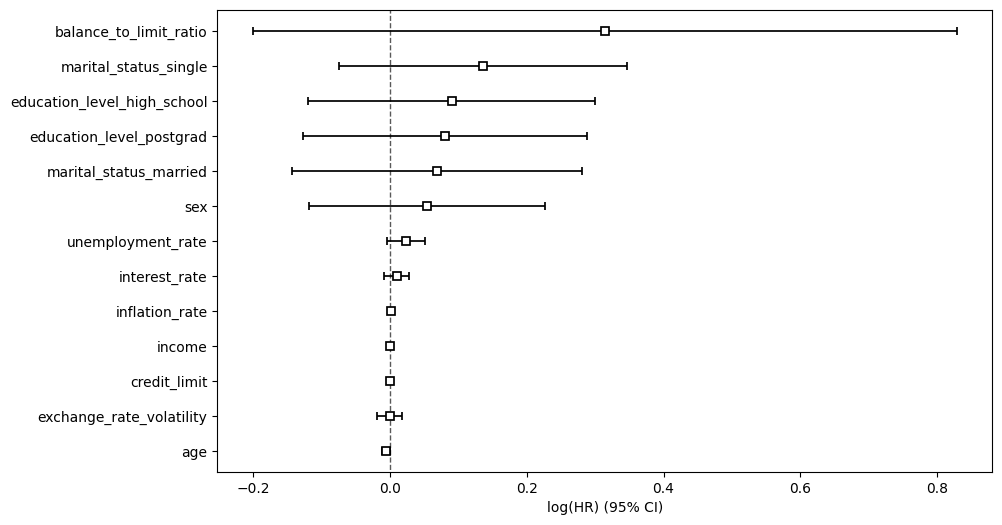

In [253]:
plt.subplots(figsize=(10,6))
cpx.plot()

<Axes: >

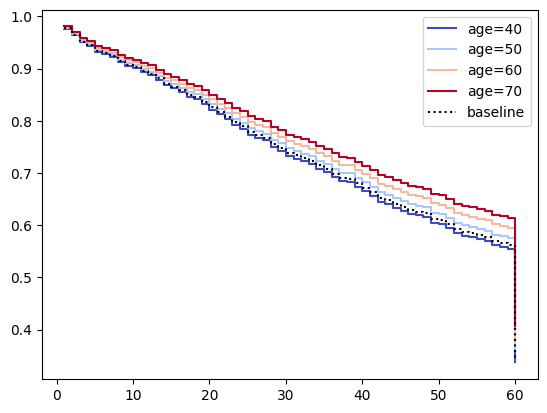

In [254]:
cpx.plot_partial_effects_on_outcome(
    covariates='age',
    values=[40, 50, 60, 70],
    cmap='coolwarm'
)


In [255]:
cpx.check_assumptions(data,p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1000 total observations, 468 right-censored observations>
         test_name = proportional_hazard_test

---
                                  test_statistic    p  -log2(p)
age                         km              2.56 0.11      3.19
                            rank            3.35 0.07      3.89
balance_to_limit_ratio      km              0.63 0.43      1.22
                            rank            1.01 0.31      1.67
credit_limit                km              0.03 0.87      0.20
                            rank            0.00 0.96      0.05
education_level_high_school km              4.56 0.03      4.94
                            rank            5.22 0.02      5.48
education_level_postgrad    km              1.67 0.20      2.35
                            rank            2.22 0.14      2.88
exchange_rate_volatility    km              0.60 0.44      1.19
                            rank            1.00 0.32      1.65
income                      km              0.29 0.59      0.76
                            rank            0.54 0.46      1.12
inflation_rate              km              1.99 0.16      2.66
                            rank            3.33 0.07      3.87
interest_rate               km              0.05 0.82      0.28
                            rank            0.05 0.83      0.28
marital_status_married      km              0.15 0.70      0.52
                            rank            0.14 0.71      0.50
marital_status_single       km              0.65 0.42      1.25
                            rank            0.64 0.43      1.23
sex                         km              1.35 0.25      2.02
                            rank            1.75 0.19      2.43
unemployment_rate           km              0.00 0.99      0.02
                            rank            0.03 0.86      0.22



1. Variable 'education_level_high_school' failed the non-proportional test: p-value is 0.0224.

   Advice: with so few unique values (only 2), you can include
`strata=['education_level_high_school', ...]` in the call in `.fit`. See documentation in link [E]
below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[]

In [256]:
from lifelines.statistics import proportional_hazard_test
results= proportional_hazard_test(cpx,data,time_transform='rank')
results.print_summary(decimals=3,model='untransformed variables')

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1000 total observations, 468 right-censored observations>
         test_name = proportional_hazard_test

---
                             test_statistic    p  -log2(p)
age                                    3.35 0.07      3.89
balance_to_limit_ratio                 1.01 0.31      1.67
credit_limit                           0.00 0.96      0.05
education_level_high_school            5.22 0.02      5.48
education_level_postgrad               2.22 0.14      2.88
exchange_rate_volatility               1.00 0.32      1.65
income                                 0.54 0.46      1.12
inflation_rate                         3.33 0.07      3.87
interest_rate                          0.05 0.83      0.28
marital_status_married                 0.14 0.71      0.50
marital_status_single                  0.64 0.43      1.23
sex                                    1.75 0.19      2.43
unemployment_rate                      0.03 0.86      0.22

### Parametric [Accelerated Failure Time Model(AFT)]

In [257]:
from lifelines import WeibullAFTFitter,\
    ExponentialFitter,\
        LogNormalAFTFitter,\
            LogLogisticFitter,\
                LogLogisticAFTFitter
            

In [258]:
aft_models = [WeibullAFTFitter(), LogNormalAFTFitter(), LogLogisticAFTFitter()]
for model in aft_models:
    model.fit(data, duration_col='duration', event_col='event')
    print(f"AIC for {model.__class__.__name__}: {model.AIC_:.2f}")

AIC for WeibullAFTFitter: 5455.07
AIC for LogNormalAFTFitter: 5633.70
AIC for LogLogisticAFTFitter: 5559.20


### **Univariate Models**


In [259]:
uni_models = [ExponentialFitter(), LogLogisticFitter()]
for model in uni_models:
    model.fit(durations=data['duration'], event_observed=data['event'])
    print(f"AIC for {model.__class__.__name__}: {model.AIC_:.2f}")

AIC for ExponentialFitter: 5498.62
AIC for LogLogisticFitter: 5546.58


In [260]:
expf= ExponentialFitter()
expf.fit(durations=data['duration'],event_observed=data['event'])
expf.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 468 right-censored observations>
   number of observations = 1000
number of events observed = 532
           log-likelihood = -2748.31
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  64.46       2.79            58.98            69.93

          cmp to     z      p   -log2(p)
lambda_     0.00 23.07 <0.005     388.61
---
AIC = 5498.62

In [261]:
loglist= LogLogisticAFTFitter()
loglist.fit(data,duration_col='duration',event_col='event')
loglist.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 468 right-censored observations>
             duration col = 'duration'
                event col = 'event'
   number of observations = 1000
number of events observed = 532
           log-likelihood = -2764.60
         time fit was run = 2025-04-18 06:42:22 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                           
alpha_ age                           0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
       balance_to_limit_ratio       -0.10       0.91       0.24            -0.56             0.37                 0.57                 1.45
       credit_limit                  0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       education_level_high_school  -0.15       0.86       0.10            -0.34             0.05                 0.71                 1.05
       education_level_postgrad     -0.10       0.90       0.10            -0.29             0.09                 0.75                 1.09
       exchange_rate_volatility     -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
       income                       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       inflation_rate                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       interest_rate                -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
       marital_status_married       -0.06       0.94       0.10            -0.25             0.14                 0.78                 1.15
       marital_status_single        -0.10       0.91       0.10            -0.29             0.09                 0.75                 1.10
       sex                           0.00       1.00       0.08            -0.15             0.16                 0.86                 1.17
       unemployment_rate            -0.02       0.98       0.01            -0.04             0.01                 0.96                 1.01
       Intercept                     4.17      64.90       0.40             3.39             4.96                29.63               142.14
beta_  Intercept                     0.42       1.53       0.04             0.35             0.50                 1.42                 1.64

                                     cmp to     z      p   -log2(p)
param  covariate                                                   
alpha_ age                             0.00  2.33   0.02       5.66
       balance_to_limit_ratio          0.00 -0.40   0.69       0.54
       credit_limit                    0.00  0.51   0.61       0.71
       education_level_high_school     0.00 -1.49   0.14       2.86
       education_level_postgrad        0.00 -1.06   0.29       1.80
       exchange_rate_volatility        0.00 -0.77   0.44       1.17
       income                          0.00 -0.77   0.44       1.18
       inflation_rate                  0.00  0.06   0.95       0.08
       interest_rate                   0.00 -0.98   0.33       1.62
       marital_status_married          0.00 -0.58   0.56       0.84
       marital_status_single           0.00 -0.99   0.32       1.64
       sex                             0.00  0.05   0.96       0.06
       unemployment_rate               0.00 -1.20   0.23       2.13
       Intercept                       0.00 10.43 <0.005      82.21
beta_  Intercept                       0.00 11.45 <0.005      98.50
---
Concordance = 0.56
AIC = 5559.20
log-likelihood ratio test = 13.38 on 13 df
-log2(p) of ll-ratio test = 1.26

In [262]:
from lifelines import GeneralizedGammaFitter
gen = GeneralizedGammaFitter()
gen.fit(durations=data['duration'],event_observed=data['event'])
gen.print_summary(3)

<lifelines.GeneralizedGammaFitter:"GeneralizedGamma_estimate", fitted with 1000 total observations, 468 right-censored observations>
   number of observations = 1000
number of events observed = 532
           log-likelihood = -2646.627
               hypothesis = mu_ != 0, ln_sigma_ != 0, lambda_ != 1

---
            coef   se(coef)   coef lower 95%   coef upper 95%
mu_        4.314      0.544            3.248            5.380
ln_sigma_ -2.242      7.816          -17.561           13.078
lambda_    7.898     61.730         -113.090          128.885

            cmp to      z       p   -log2(p)
mu_          0.000  7.935 <0.0005     48.755
ln_sigma_    0.000 -0.287   0.774      0.369
lambda_      1.000  0.112   0.911      0.134
---
AIC = 5299.254

## **Fit the weilbull filter and print summary** 

In [263]:
from lifelines import WeibullAFTFitter
weilbull_aft = WeibullAFTFitter()
weilbull_aft.fit(data,duration_col='duration',event_col='event')
weilbull_aft.print_summary(3)


<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 468 right-censored observations>
             duration col = 'duration'
                event col = 'event'
   number of observations = 1000
number of events observed = 532
           log-likelihood = -2712.534
         time fit was run = 2025-04-18 06:42:40 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                           
lambda_ age                          0.004      1.004      0.002           -0.000            0.008                1.000                1.008
        balance_to_limit_ratio      -0.141      0.869      0.191           -0.515            0.233                0.598                1.263
        credit_limit                 0.000      1.000      0.000           -0.000            0.000                1.000                1.000
        education_level_high_school -0.078      0.925      0.078           -0.231            0.076                0.794                1.079
        education_level_postgrad    -0.061      0.941      0.077           -0.213            0.091                0.809                1.095
        exchange_rate_volatility    -0.003      0.997      0.007           -0.016            0.010                0.984                1.010
        income                      -0.000      1.000      0.000           -0.000            0.000                1.000                1.000
        inflation_rate              -0.000      1.000      0.001           -0.003            0.002                0.997                1.002
        interest_rate               -0.008      0.992      0.007           -0.021            0.005                0.979                1.006
        marital_status_married      -0.063      0.939      0.079           -0.218            0.092                0.804                1.096
        marital_status_single       -0.105      0.900      0.078           -0.259            0.048                0.772                1.049
        sex                         -0.013      0.988      0.064           -0.138            0.113                0.871                1.120
        unemployment_rate           -0.016      0.985      0.010           -0.036            0.005                0.965                1.005
        Intercept                    4.530     92.724      0.326            3.891            5.169               48.944              175.666
rho_    Intercept                    0.313      1.368      0.037            0.240            0.387                1.271                1.472

                                      cmp to      z       p   -log2(p)
param   covariate                                                     
lambda_ age                            0.000  1.867   0.062      4.014
        balance_to_limit_ratio         0.000 -0.737   0.461      1.117
        credit_limit                   0.000  0.273   0.785      0.350
        education_level_high_school    0.000 -0.991   0.322      1.637
        education_level_postgrad       0.000 -0.786   0.432      1.210
        exchange_rate_volatility       0.000 -0.413   0.679      0.558
        income                         0.000 -0.981   0.326      1.615
        inflation_rate                 0.000 -0.374   0.708      0.498
        interest_rate                  0.000 -1.142   0.254      1.979
        marital_status_married         0.000 -0.799   0.424      1.237
        marital_status_single          0.000 -1.344   0.179      2.481
        sex                            0.000 -0.196   0.845      0.244
        unemployment_rate              0.000 -1.499   0.134      2.901
        Intercept                      0.000 13.894 <0.0005    143.391
rho_    Intercept                      0.000  8.357 <0.0005     53.792
---
Concordance = 0.552
AIC = 5455.068
log-likelihood ratio t

In [ ]:
T = data['duration']
E = data['event']

wf = WeibullFitter().fit(T, E)

surv_prob = wf.survival_function_at_times(12).values[0]

prob_default = 1 - surv_prob

In [265]:
prob_default

0.10876534117566794

In [266]:
data['duration']

0      59
1      60
2      39
3       1
4      48
       ..
995     1
996    60
997     7
998    60
999    51
Name: duration, Length: 1000, dtype: int64

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from lifelines import (
    WeibullFitter, ExponentialFitter, LogNormalFitter, 
    LogLogisticFitter, NelsonAalenFitter, PiecewiseExponentialFitter, 
    GeneralizedGammaFitter, SplineFitter
)


T = data['duration']
E = data['event']

models = {
    "WeibullFitter": WeibullFitter(),
    "ExponentialFitter": ExponentialFitter(),
    "LogNormalFitter": LogNormalFitter(),
    "NelsonAalenFitter": NelsonAalenFitter(),
    "LogLogisticFitter": LogLogisticFitter(),
    "PiecewiseExponentialFitter": PiecewiseExponentialFitter(breakpoints=[40, 60]),
    "GeneralizedGammaFitter": GeneralizedGammaFitter(),
    "SplineFitter": SplineFitter([6, 20, 40, 75]) 
}


for name, model in models.items():
    model.fit(T, E, label=name)


fig = make_subplots(rows=3, cols=3, subplot_titles=list(models.keys()))

row_col_positions = [(i // 3 + 1, i % 3 + 1) for i in range(len(models))]

for (name, model), (row, col) in zip(models.items(), row_col_positions):
    ch_df = model.cumulative_hazard_
    fig.add_trace(
        go.Scatter(x=ch_df.index, y=ch_df.iloc[:, 0], mode='lines', name=name),
        row=row, col=col
    )

fig.update_layout(height=800, width=1000, title_text="Cumulative Hazard Functions ", showlegend=False)
fig.show()


## **Non Parametric**

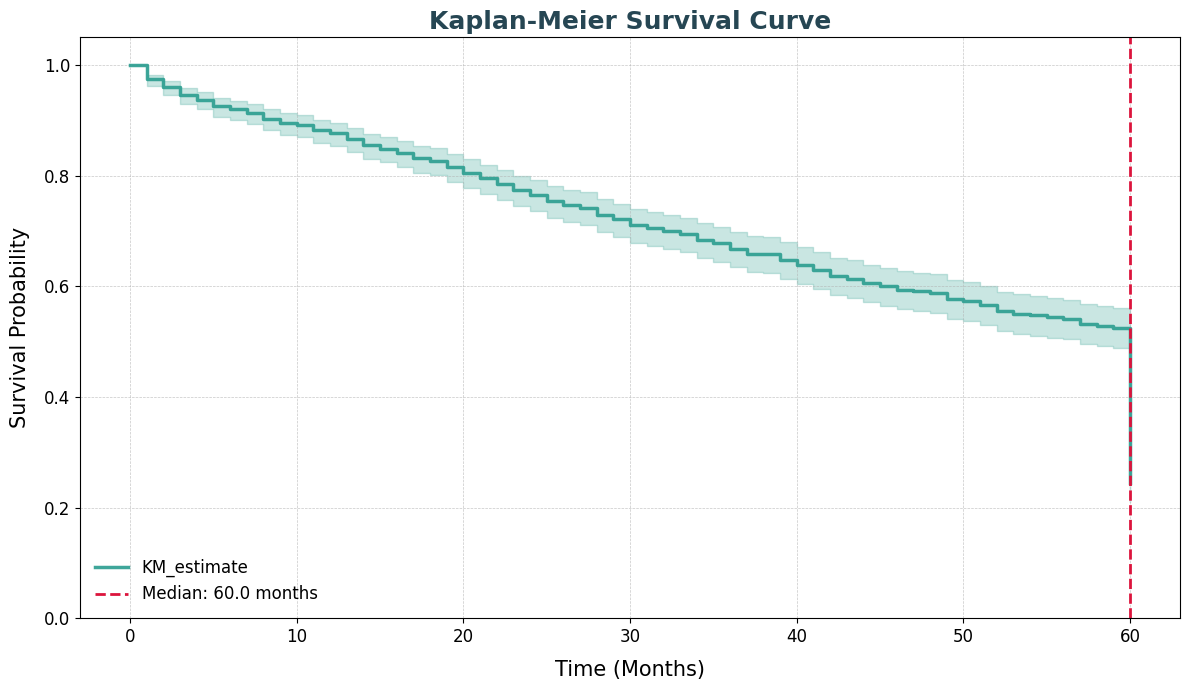

In [268]:

kmf = KaplanMeierFitter()
kmf.fit(data['duration'], event_observed=data['event'])


plt.figure(figsize=(12, 7))
ax = kmf.plot(
    ci_show=True,
    linewidth=2.5,
    linestyle='-',
    color='#2a9d8f',
    alpha=0.9
)


plt.title("Kaplan-Meier Survival Curve", fontsize=18, fontweight='bold', color='#264653')
plt.xlabel("Time (Months)", fontsize=15, labelpad=10)
plt.ylabel("Survival Probability", fontsize=15, labelpad=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)

if hasattr(kmf, 'median_survival_time_'):
    median_surv = kmf.median_survival_time_
    plt.axvline(median_surv, color='crimson', linestyle='--', linewidth=2, label=f"Median: {median_surv:.1f} months")
    plt.legend(fontsize=12, loc='best', frameon=False)

plt.tight_layout()
plt.show()


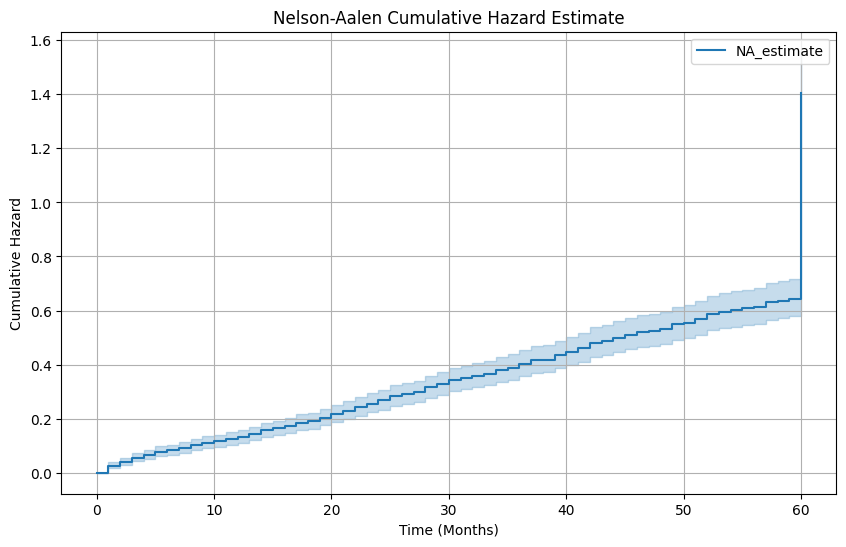

In [269]:
naf = NelsonAalenFitter()
naf.fit(data['duration'], event_observed=data['event'])

plt.figure(figsize=(10,6))
naf.plot()
plt.title("Nelson-Aalen Cumulative Hazard Estimate")
plt.xlabel("Time (Months)")
plt.ylabel("Cumulative Hazard")
plt.grid(True)
plt.show()


          NA_estimate
timeline             
0.0          0.000000
1.0          0.026331
2.0          0.041091
3.0          0.056317
4.0          0.065201


<Axes: xlabel='timeline'>

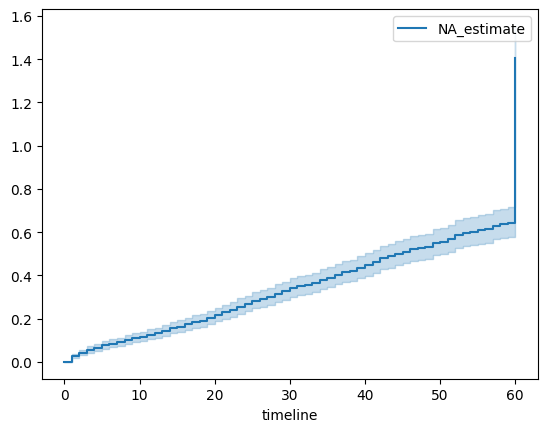

In [270]:
print(naf.cumulative_hazard_.head())
naf.plot_cumulative_hazard()

In [271]:
df['income_group'] = pd.qcut(df['income'], q=3, labels=['Low', 'Medium', 'High'])


In [272]:

def plot_km_by_group(df, time_col, event_col, group_col, title):
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(12, 7))
    
    for group in df[group_col].dropna().unique():
        mask = df[group_col] == group
        durations = df.loc[mask, time_col]
        events = df.loc[mask, event_col]

        kmf.fit(durations=durations, event_observed=events, label=str(group))
        kmf.plot_survival_function(ci_show=True, linewidth=2)

    plt.title(title, fontsize=18, fontweight='bold', color='#264653')
    plt.xlabel("Time (Months)", fontsize=14)
    plt.ylabel("Survival Probability", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 1.05)
    plt.legend(title=group_col, fontsize=12, title_fontsize=13, loc='best', frameon=False)
    plt.tight_layout()
    plt.show()


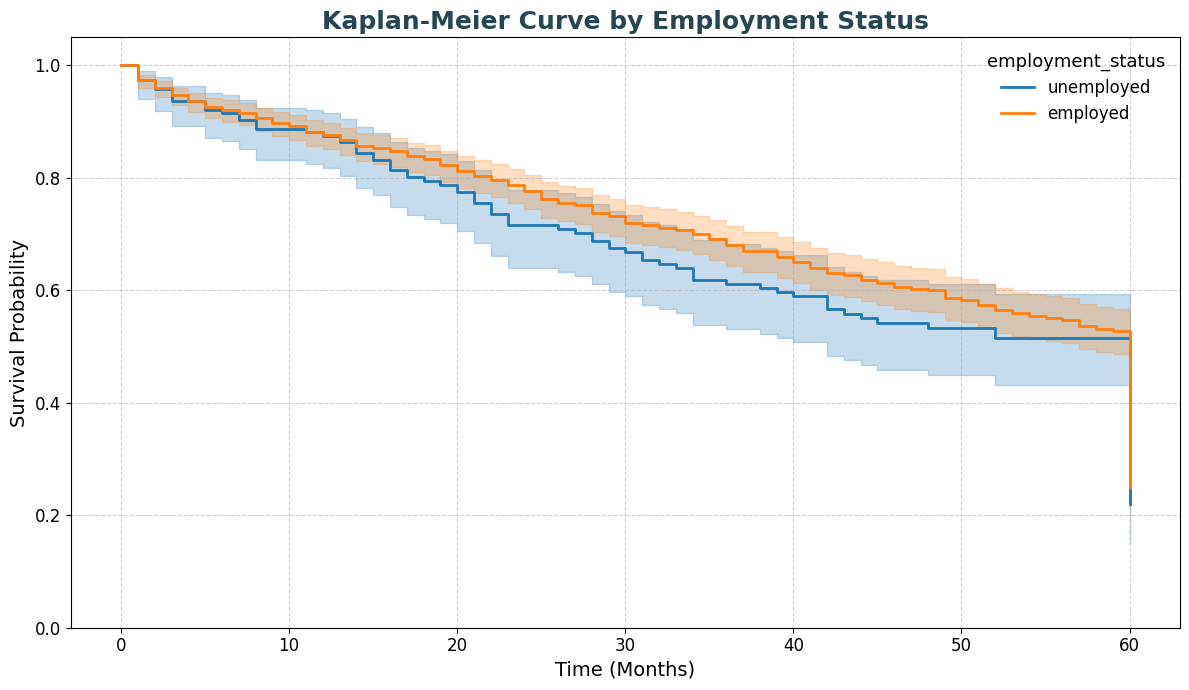

In [273]:
plot_km_by_group(df, time_col='duration', event_col='event',
                 group_col='employment_status',
                 title='Kaplan-Meier Curve by Employment Status')


In [274]:
from lifelines.statistics import logrank_test

group1 = df[df['employment_status'] == 'employed']
group2 = df[df['employment_status'] == 'unemployed']

results = logrank_test(group1['duration'], group2['duration'], event_observed_A=group1['event'], event_observed_B=group2['event'])
results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.11 0.29      1.78

In [275]:
from lifelines import NelsonAalenFitter, PiecewiseExponentialFitter
import matplotlib.pyplot as plt

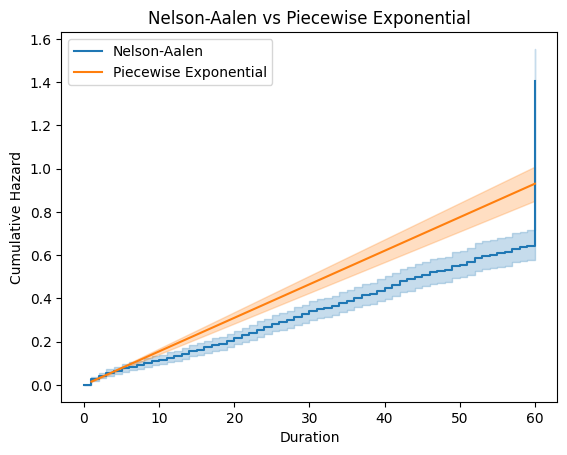

<lifelines.PiecewiseExponentialFitter:"PiecewiseExponential_estimate", fitted with 1000 total observations, 468 right-censored observations>
   number of observations = 1000
number of events observed = 532
           log-likelihood = -2748.307
               hypothesis = lambda_0_ != 1, lambda_1_ != 1, lambda_2_ != 1

---
            coef   se(coef)   coef lower 95%   coef upper 95%
lambda_0_ 64.477      2.796           58.996           69.958
lambda_1_  0.000      0.000            0.000            0.000
lambda_2_  0.000      0.000            0.000            0.000

            cmp to      z       p   -log2(p)
lambda_0_    1.000 22.700 <0.0005    376.546
lambda_1_    1.000   -inf <0.0005        inf
lambda_2_    1.000   -inf <0.0005        inf
---
AIC = 5502.615

In [ ]:
from lifelines import NelsonAalenFitter, PiecewiseExponentialFitter
import matplotlib.pyplot as plt

naf = NelsonAalenFitter()
naf.fit(data['duration'], event_observed=data['event'])


ax = naf.plot(label="Nelson-Aalen")

pf = PiecewiseExponentialFitter(breakpoints=[400, 500])
pf.fit(data['duration'], event_observed=data['event'])


pf.plot(ax=ax, label="Piecewise Exponential")


plt.legend()
plt.xlabel("Duration")
plt.ylabel("Cumulative Hazard")
plt.title("Nelson-Aalen vs Piecewise Exponential")


plt.show()


pf.print_summary(3)

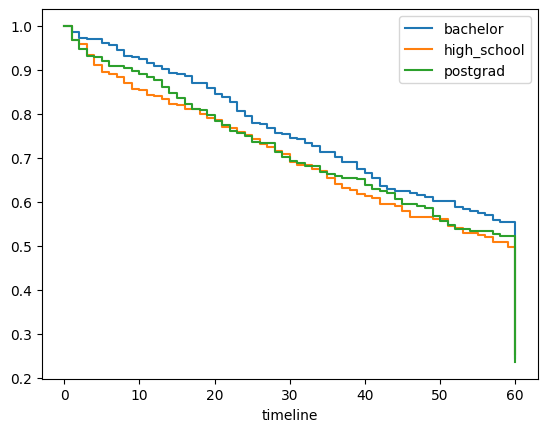

In [164]:
kmf = KaplanMeierFitter()

ax = plt.subplot()

for name, df_ in df[['education_level','event', 'duration']].groupby('education_level'):
    kmf.fit(df_['duration'], df_['event'], label=name)
    ax = kmf.plot(ax=ax, ci_show=False)

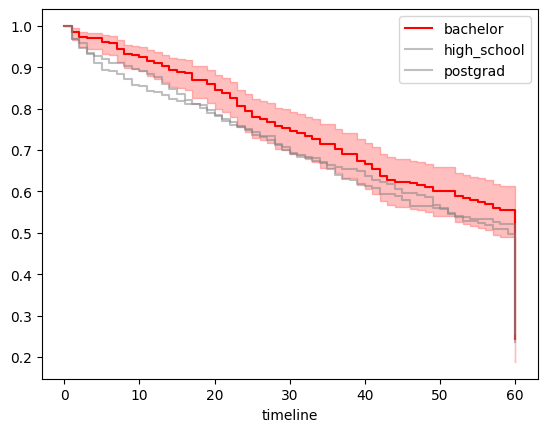

In [165]:
ax = plt.subplot()

for name, df_ in df[['education_level','event', 'duration']].groupby('education_level'):
    kmf.fit(df_['duration'], df_['event'], label=name)
    if name == 'bachelor':
        ax = kmf.plot(ax=ax, color='r')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)